In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Стиль для графиков
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('data.csv')

print("Первые 5 строк датасета:")
display(df.head())

# Информация о датасете: типы, пропуски
print("\nИнформация о датасете:")
df.info()

# Статистические характеристики числовых признаков
print("\nСтатистические характеристики:")
display(df.describe())

Первые 5 строк датасета:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


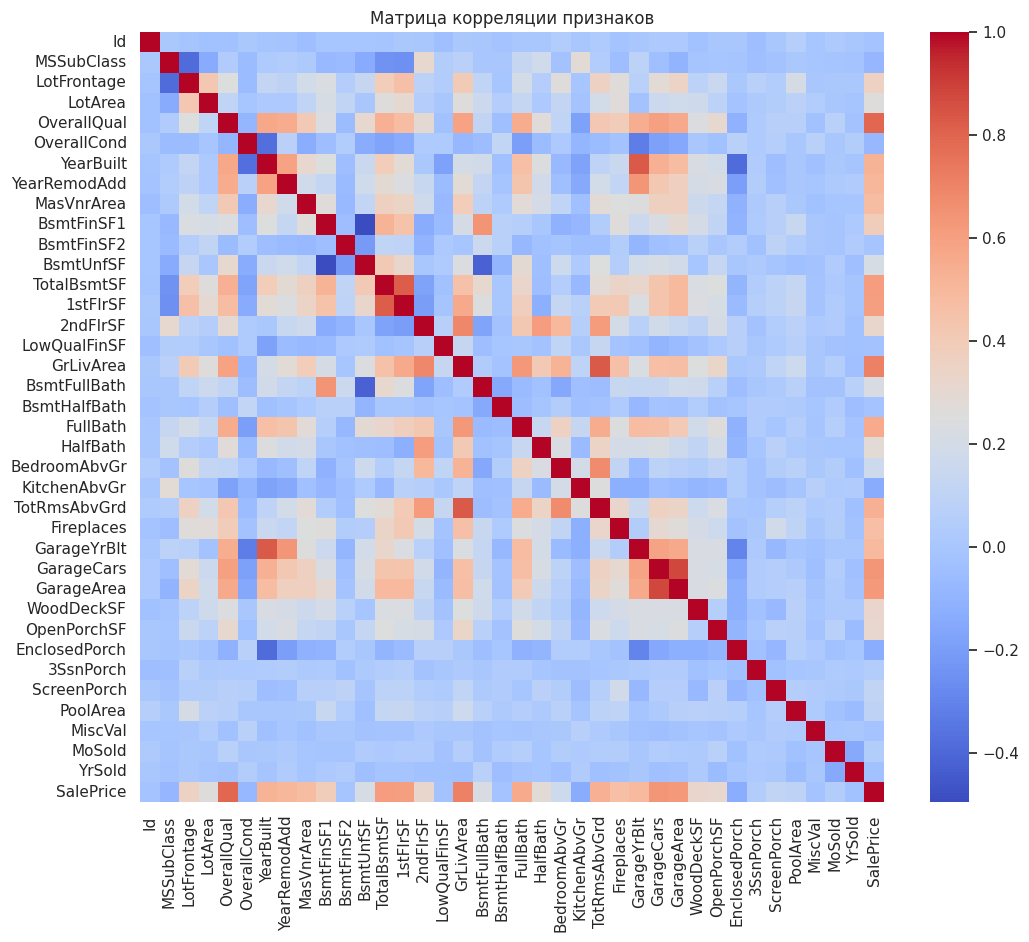


Корреляция с SalePrice (топ-10):
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [7]:
# Выберем только числовые признаки для корреляции
numeric_df = df.select_dtypes(include=[np.number])

# Матрица корреляции
plt.figure(figsize=(12, 10))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Матрица корреляции признаков')
plt.show()

# Корреляция с целевой переменной SalePrice
print("\nКорреляция с SalePrice (топ-10):")
print(corr_matrix['SalePrice'].sort_values(ascending=False).head(11))

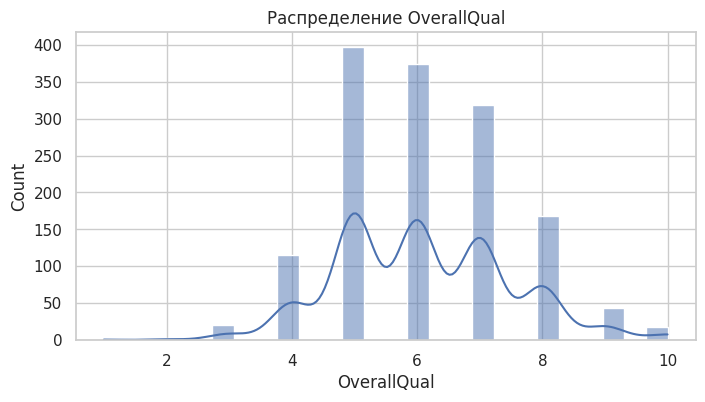

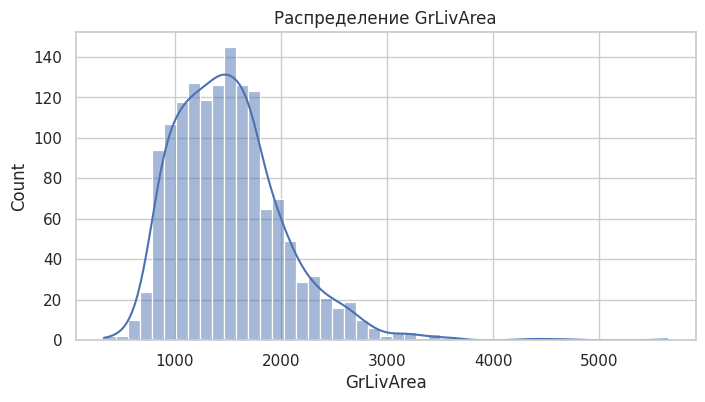

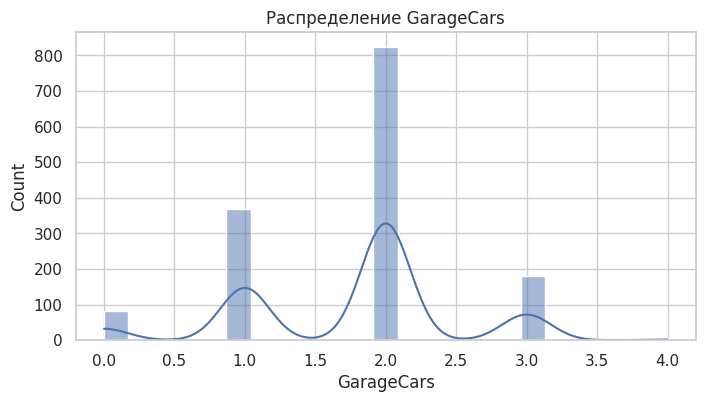

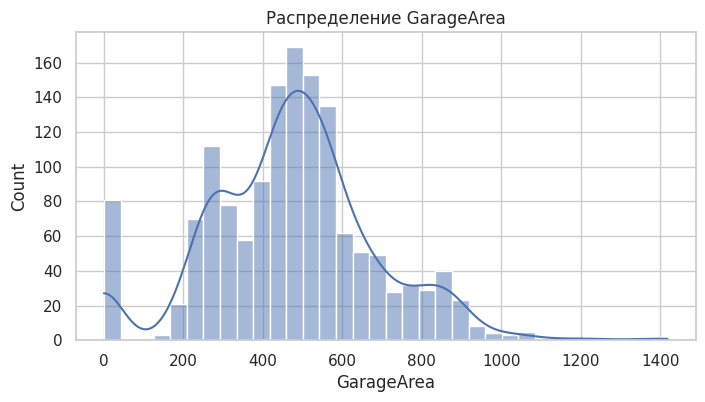

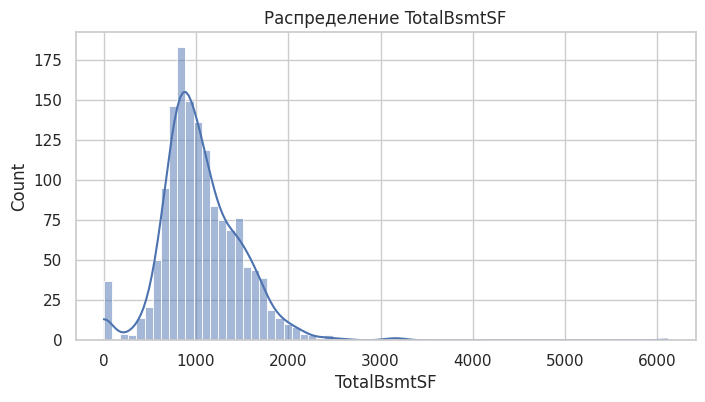

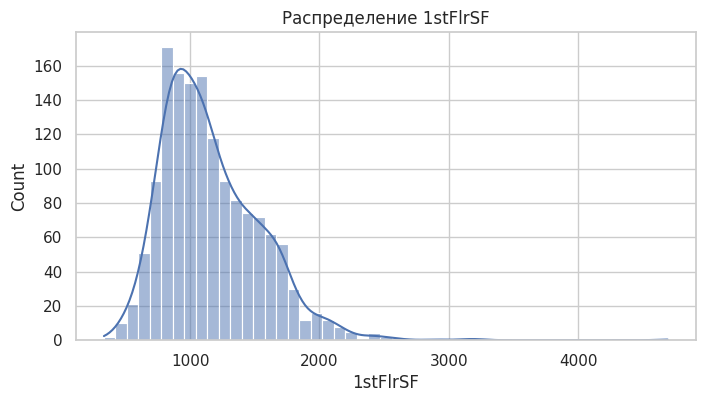

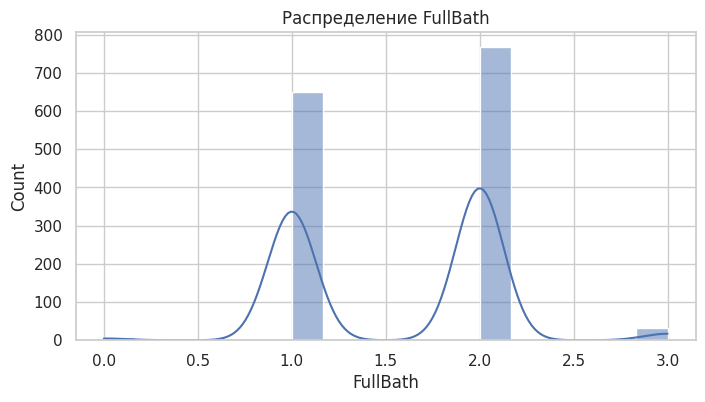

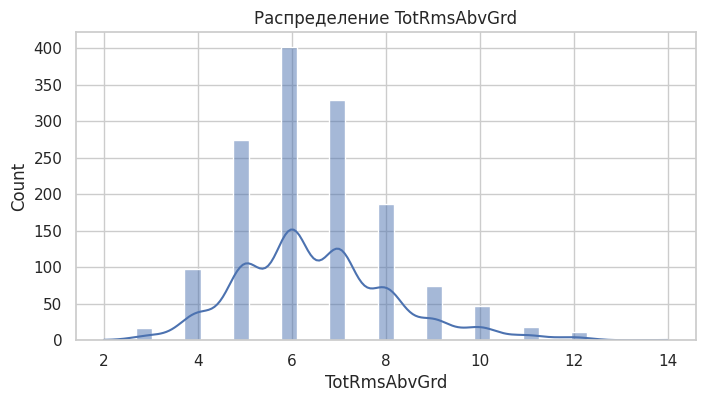

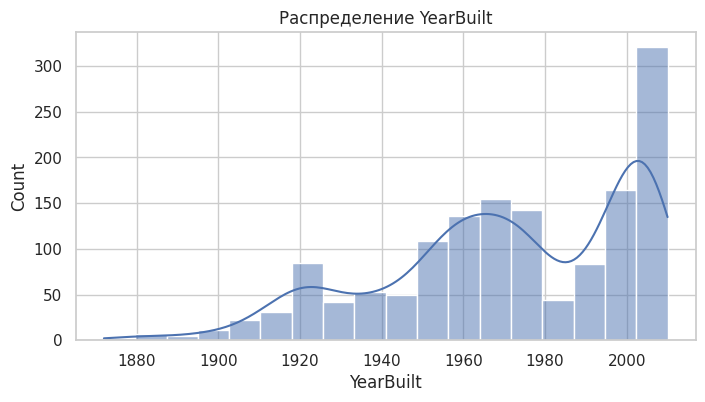

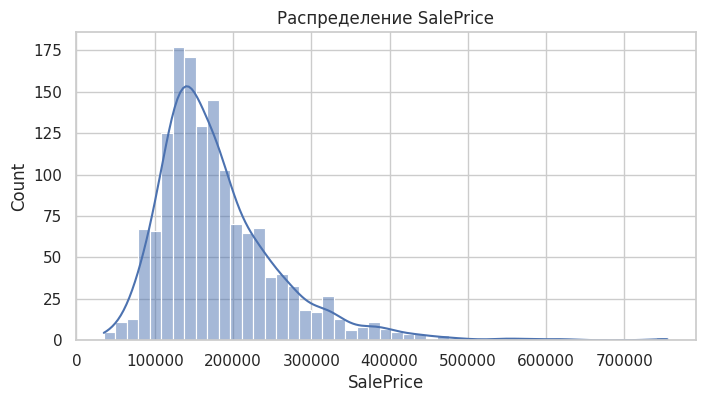

In [8]:
# Гистограммы для ключевых числовых признаков (выберем топ по корреляции)
key_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'SalePrice']

for feature in key_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Распределение {feature}')
    plt.show()

In [3]:
# Пропуски: сколько в каждом столбце
print("\nПропуски в данных:")
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])

# Обработка пропусков
# Для числовых: заполним средним
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Для категориальных: заполним 'None' или модой
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'None')

# Удалим ID, если не нужен
df = df.drop(['Id'], axis=1, errors='ignore')

# Обработка выбросов: используем IQR для SalePrice и ключевых фич
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Применим к SalePrice
df = remove_outliers(df, 'SalePrice')

# Применим к GrLivArea (часто имеет выбросы)
df = remove_outliers(df, 'GrLivArea')

print("\nДанные после обработки пропусков и выбросов:")
print(df.shape)


Пропуски в данных:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

Данные после обработки пропусков и выбросов:
(1378, 80)


In [ ]:
# Целевая переменная (raw data)
X_raw = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Сначала делим на train/test (80/20)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)

# Определим числовые и категориальные колонки
numeric_cols = X_train_raw.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train_raw.select_dtypes(include=['object']).columns.tolist()

# Преобразователь: OneHot для категориальных, StandardScaler для числовых
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ])

# Fit получается только на train данных
preprocessor.fit(X_train_raw)

# Transform на train и test отдельно
X_train = preprocessor.transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

# Конвертируем в тензоры PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Dataloader для train
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [7]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size=128, output_size=1):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc3 = nn.Linear(hidden_size // 2, output_size)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Epoch [10/100], Loss: 17578749015.7714
Epoch [20/100], Loss: 796555196.3429
Epoch [30/100], Loss: 547141733.0286
Epoch [40/100], Loss: 463009151.5429
Epoch [50/100], Loss: 411884394.0571
Epoch [60/100], Loss: 376241107.2000
Epoch [70/100], Loss: 345704853.4857
Epoch [80/100], Loss: 325878780.3429
Epoch [90/100], Loss: 303887048.9143
Epoch [100/100], Loss: 296019240.2286


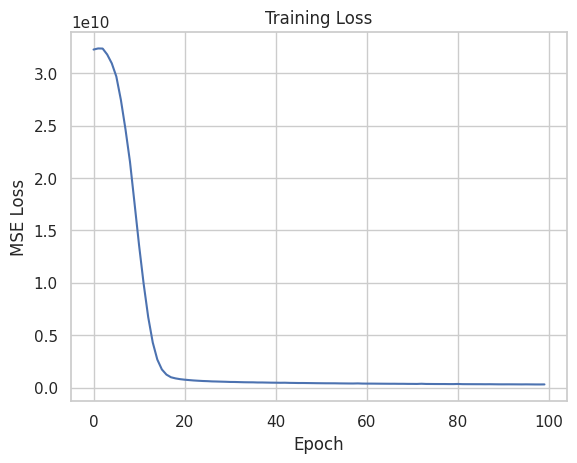

In [8]:
# Функция для обучения
def train_model(model, loader, optimizer, criterion, epochs=100):
    model.train()
    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for inputs, targets in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        losses.append(epoch_loss / len(loader))
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {losses[-1]:.4f}')
    return losses

# Инициализация
input_size = X_train.shape[1]
model = MLP(input_size)

# Функция потерь: MSE для регрессии
criterion = nn.MSELoss()

# Оптимизатор
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение
train_losses = train_model(model, train_loader, optimizer, criterion, epochs=100)

# График потерь
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()

In [9]:
# Оценка
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy().flatten()
    y_true = y_test_tensor.numpy().flatten()

# Метрики
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f'\nМетрики на тестовой выборке:')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.4f}')


Метрики на тестовой выборке:
MSE: 353367936.00
RMSE: 18798.08
MAE: 13130.44
R²: 0.8942


In [10]:
# Простой подбор: попробуем разные lr и hidden_size
best_rmse = float('inf')
best_params = {}

for lr in [0.001, 0.01, 0.0001]:
    for hidden_size in [64, 128, 256]:
        model = MLP(input_size, hidden_size)
        optimizer = optim.Adam(model.parameters(), lr=lr)
        train_model(model, train_loader, optimizer, criterion, epochs=50)  # Меньше эпох для скорости
        
        model.eval()
        with torch.no_grad():
            y_pred = model(X_test_tensor).numpy().flatten()
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        
        print(f'lr={lr}, hidden_size={hidden_size}, RMSE={rmse:.2f}')
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = {'lr': lr, 'hidden_size': hidden_size}

print(f'\nЛучшие параметры: {best_params}, RMSE: {best_rmse:.2f}')

Epoch [10/50], Loss: 28590382752.9143
Epoch [20/50], Loss: 8720731443.2000
Epoch [30/50], Loss: 988590076.3429
Epoch [40/50], Loss: 651399316.1143
Epoch [50/50], Loss: 547702460.3429
lr=0.001, hidden_size=64, RMSE=24263.17
Epoch [10/50], Loss: 20653291198.1714
Epoch [20/50], Loss: 946490724.5714
Epoch [30/50], Loss: 581280914.2857
Epoch [40/50], Loss: 492517239.7714
Epoch [50/50], Loss: 429710874.5143
lr=0.001, hidden_size=128, RMSE=21912.01
Epoch [10/50], Loss: 2835915516.3429
Epoch [20/50], Loss: 540876786.1714
Epoch [30/50], Loss: 434956618.5143
Epoch [40/50], Loss: 373070506.5143
Epoch [50/50], Loss: 337479496.2286
lr=0.001, hidden_size=256, RMSE=19831.64
Epoch [10/50], Loss: 395641171.6571
Epoch [20/50], Loss: 287190306.2857
Epoch [30/50], Loss: 244523246.4000
Epoch [40/50], Loss: 226339704.4571
Epoch [50/50], Loss: 214393625.8286
lr=0.01, hidden_size=64, RMSE=18133.30
Epoch [10/50], Loss: 325146911.5429
Epoch [20/50], Loss: 237312517.2571
Epoch [30/50], Loss: 203634156.5714
Epoch